# 9.4 Reading and Writing Files

Now that we've learned how to open and close a file, it's time to learn how to work with files by reading or writing to them.  In this lesson we'll learn how to:

- Read files using the `read()`, `readline()`, `readlines()` methods.
- How to iterate over a file using a `for` loop.
- Writing content to files using `write()` and `writelines()` methods.
- Working with byte files using the `b` file permission option.

## Outline
- The `read()`, `readline()`, and the `readlines()` methods of a file handler.
- Iterating over the contents of a file.
- The `write()` and `writelines()` methods of a file handler
- Working with bytes

## Reading Files

Reading through a file is done by using one of three file handler methods:

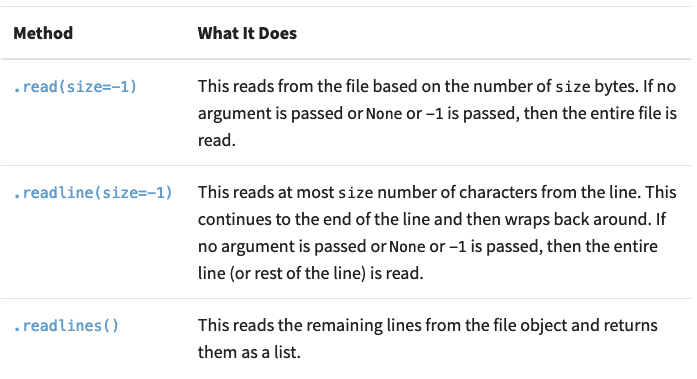

### File Handle Method: `read()`

In [1]:
with open('resources/darth_plagueis_tragedy.txt') as fh:
    print(fh.read())

### File Handle Method: `read()` - Reading a few bytes at a time

In [2]:
with open('resources/darth_plagueis_tragedy.txt') as fh:
    print(f'"{fh.read(4)}"')
    print(f'"{fh.read(4)}"')
    print(f'"{fh.read(4)}"')

### File Handle Method: `readline()`

In [3]:
import pathlib
path = pathlib.Path('resources/darth_plagueis_tragedy.txt')
with open(path) as fh:
    print(f'"{fh.readline()}"')
    print(f'"{fh.readline()}"')
    print(f'"{fh.readline(20)}"')

<div class="alert alert-info">
    <b>Note:</b> Notice that the newline from the file AND the newline that <code>print()</code> are inserted here.  We can stop <code>print()</code> from doing this by adding the <code>end</code> parameter: <code>print(f'"{fh.readline()}"', end='')</code>.
</div>

### File Handle Method: `readline()` - Stripping the newline at the end

In [4]:
import pathlib
path = pathlib.Path('resources/darth_plagueis_tragedy.txt')
with open(path) as fh:
    print(f'"{fh.readline().strip()}"')
    print(f'"{fh.readline().strip()}"')
    print(f'"{fh.readline(20)}"')

### File Handle Method: `readlines()`

In [5]:
with open('resources/darth_plagueis_tragedy.txt') as fh:
    print(fh.readlines())

## Iterating Over the Contents of a File


Most of the time when we're working with files, we'll want to iterate through each line and perform some analysis of the line.  Doing this in Python is actually rather simple:

In [6]:
with open('resources/darth_plagueis_tragedy.txt') as fh:
    for line in fh:
        print(line)

Did you ever hear the tragedy of Darth Plagueis The Wise? 



I thought not. It’s not a story the Jedi would tell you. 



It’s a Sith legend. Darth Plagueis was a Dark Lord of the Sith, so powerful and so wise he could use the Force to influence the midichlorians to create life… He had such a knowledge of the dark side that he could even keep the ones he cared about from dying. The dark side of the Force is a pathway to many abilities some consider to be unnatural. He became so powerful… the only thing he was afraid of was losing his power, which eventually, of course, he did. Unfortunately, he taught his apprentice everything he knew, then his apprentice killed him in his sleep. Ironic. He could save others from death, but not himself.


### Printing without the added line ending

In [7]:
with open('resources/darth_plagueis_tragedy.txt') as fh:
    for line in fh:
        print(line, end='')

Did you ever hear the tragedy of Darth Plagueis The Wise? 

I thought not. It’s not a story the Jedi would tell you. 

It’s a Sith legend. Darth Plagueis was a Dark Lord of the Sith, so powerful and so wise he could use the Force to influence the midichlorians to create life… He had such a knowledge of the dark side that he could even keep the ones he cared about from dying. The dark side of the Force is a pathway to many abilities some consider to be unnatural. He became so powerful… the only thing he was afraid of was losing his power, which eventually, of course, he did. Unfortunately, he taught his apprentice everything he knew, then his apprentice killed him in his sleep. Ironic. He could save others from death, but not himself.

## Writing to a File

Writing to a file requires that the file be opened with the `'w'` or write permission:

In [8]:
with open('resources/test_file.txt', 'w') as writer:
    pass

<div class="alert alert-info">
    <b>Note:</b> The file doesn't need to exist to write to it.  Python will create the file for you when using the <code>'w'</code> permissions.  The above example is similar to the <code>.touch()</code> method for the <code>pathlib.Path</code> object.
</div>

<div class="alert alert-warning">
    <b>Warning:</b> If the file already exists, this will erase the contents of the file and start anew.  We'll go over how to append to a file later.
</div>

Once properly openend, interacting with the file can be done by using one of the two file handler methods:

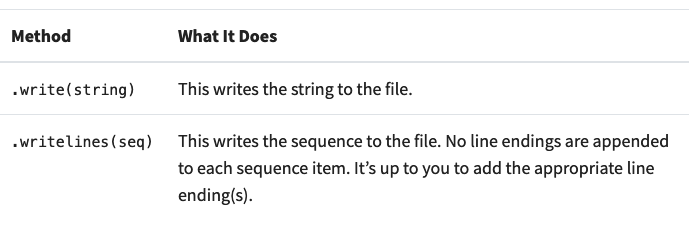

### File Handle Method: `write()`

In [9]:
out_str = "This is a test\nof the write() method in Python"
with open('resources/test_file.txt', 'w') as writer:
    writer.write(out_str)
    
with open('resources/test_file.txt', 'r') as reader:
    print(reader.read())

This is a test
of the write() method in Python


In [10]:
out_list = ["This is a test\n", "of the write() method in Python"]
with open('resources/test_file.txt', 'w') as writer:
    writer.writelines(out_list)
    
with open('resources/test_file.txt', 'r') as reader:
    print(reader.read())

This is a test
of the write() method in Python


## Working with Bytes

One final thing to consider is that not all files can be read as regular text files.  These files may includes image, video, or audio files or even files like executables.  Python can still read these files, but it may requires some different considerations.

We open a file by adding a `'b'` to the permission string:

In [11]:
with open('resources/darth_plagueis_tragedy.txt', 'rb') as reader:
    for line in reader:
        print(line)

b'Did you ever hear the tragedy of Darth Plagueis The Wise? \n'
b'\n'
b'I thought not. It\xe2\x80\x99s not a story the Jedi would tell you. \n'
b'\n'
b'It\xe2\x80\x99s a Sith legend. Darth Plagueis was a Dark Lord of the Sith, so powerful and so wise he could use the Force to influence the midichlorians to create life\xe2\x80\xa6 He had such a knowledge of the dark side that he could even keep the ones he cared about from dying. The dark side of the Force is a pathway to many abilities some consider to be unnatural. He became so powerful\xe2\x80\xa6 the only thing he was afraid of was losing his power, which eventually, of course, he did. Unfortunately, he taught his apprentice everything he knew, then his apprentice killed him in his sleep. Ironic. He could save others from death, but not himself.'


<div class="alert alert-info">
    <b>Note:</b> Notice that the file handler returns a bytes object instead of a string.
</div>

Some files may not have line endings in them though, so most likely you'll need to rethink how your work through the contents.  Let's take a simple PNG file:

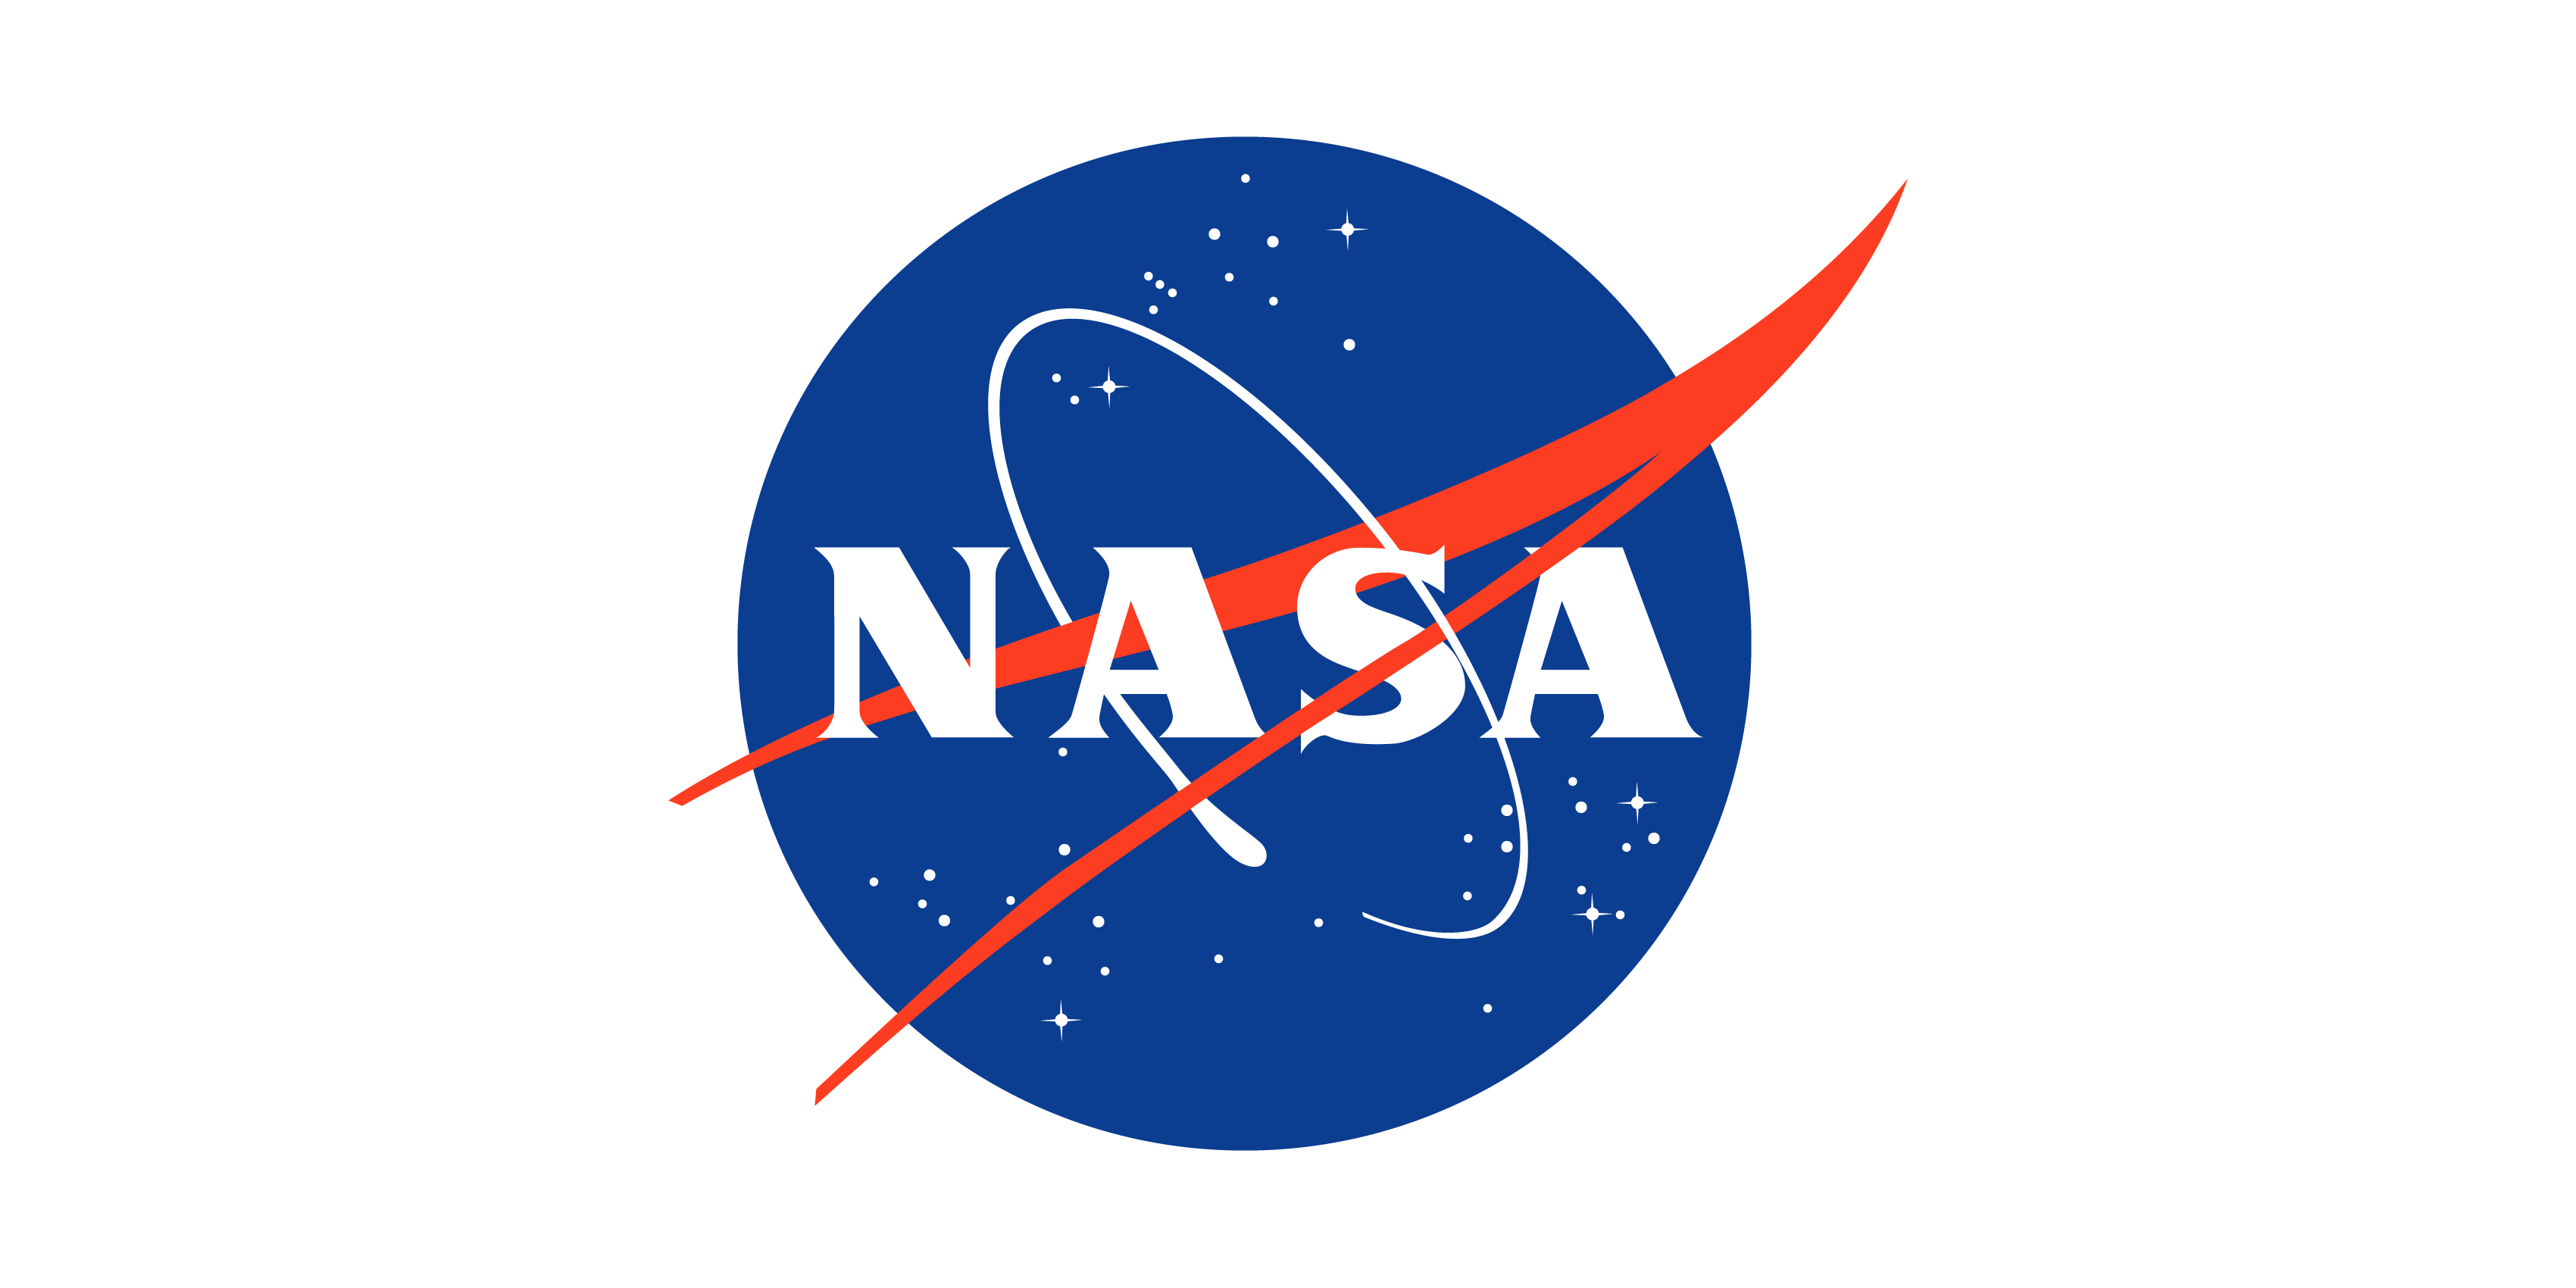

In [13]:
path = pathlib.Path('resources/nasa-logo-web-rgb.png')
with open(path, 'rb') as png_reader:
    print(png_reader.read(1)) # Magic Number
    print(png_reader.read(3)) # PNG
    print(png_reader.read(2)) # CRLF (Dos style new line)
    print(png_reader.read(1)) # 1A (Dos command)
    print(png_reader.read(1)) # LF (Unix style new line)

b'\x89'
b'PNG'
b'\r\n'
b'\x1a'
b'\n'
